In [113]:
import h5py
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

%matplotlib inline

## Output of the EYE_TRACKING_TO_SCREEN_MAPPING Queue:

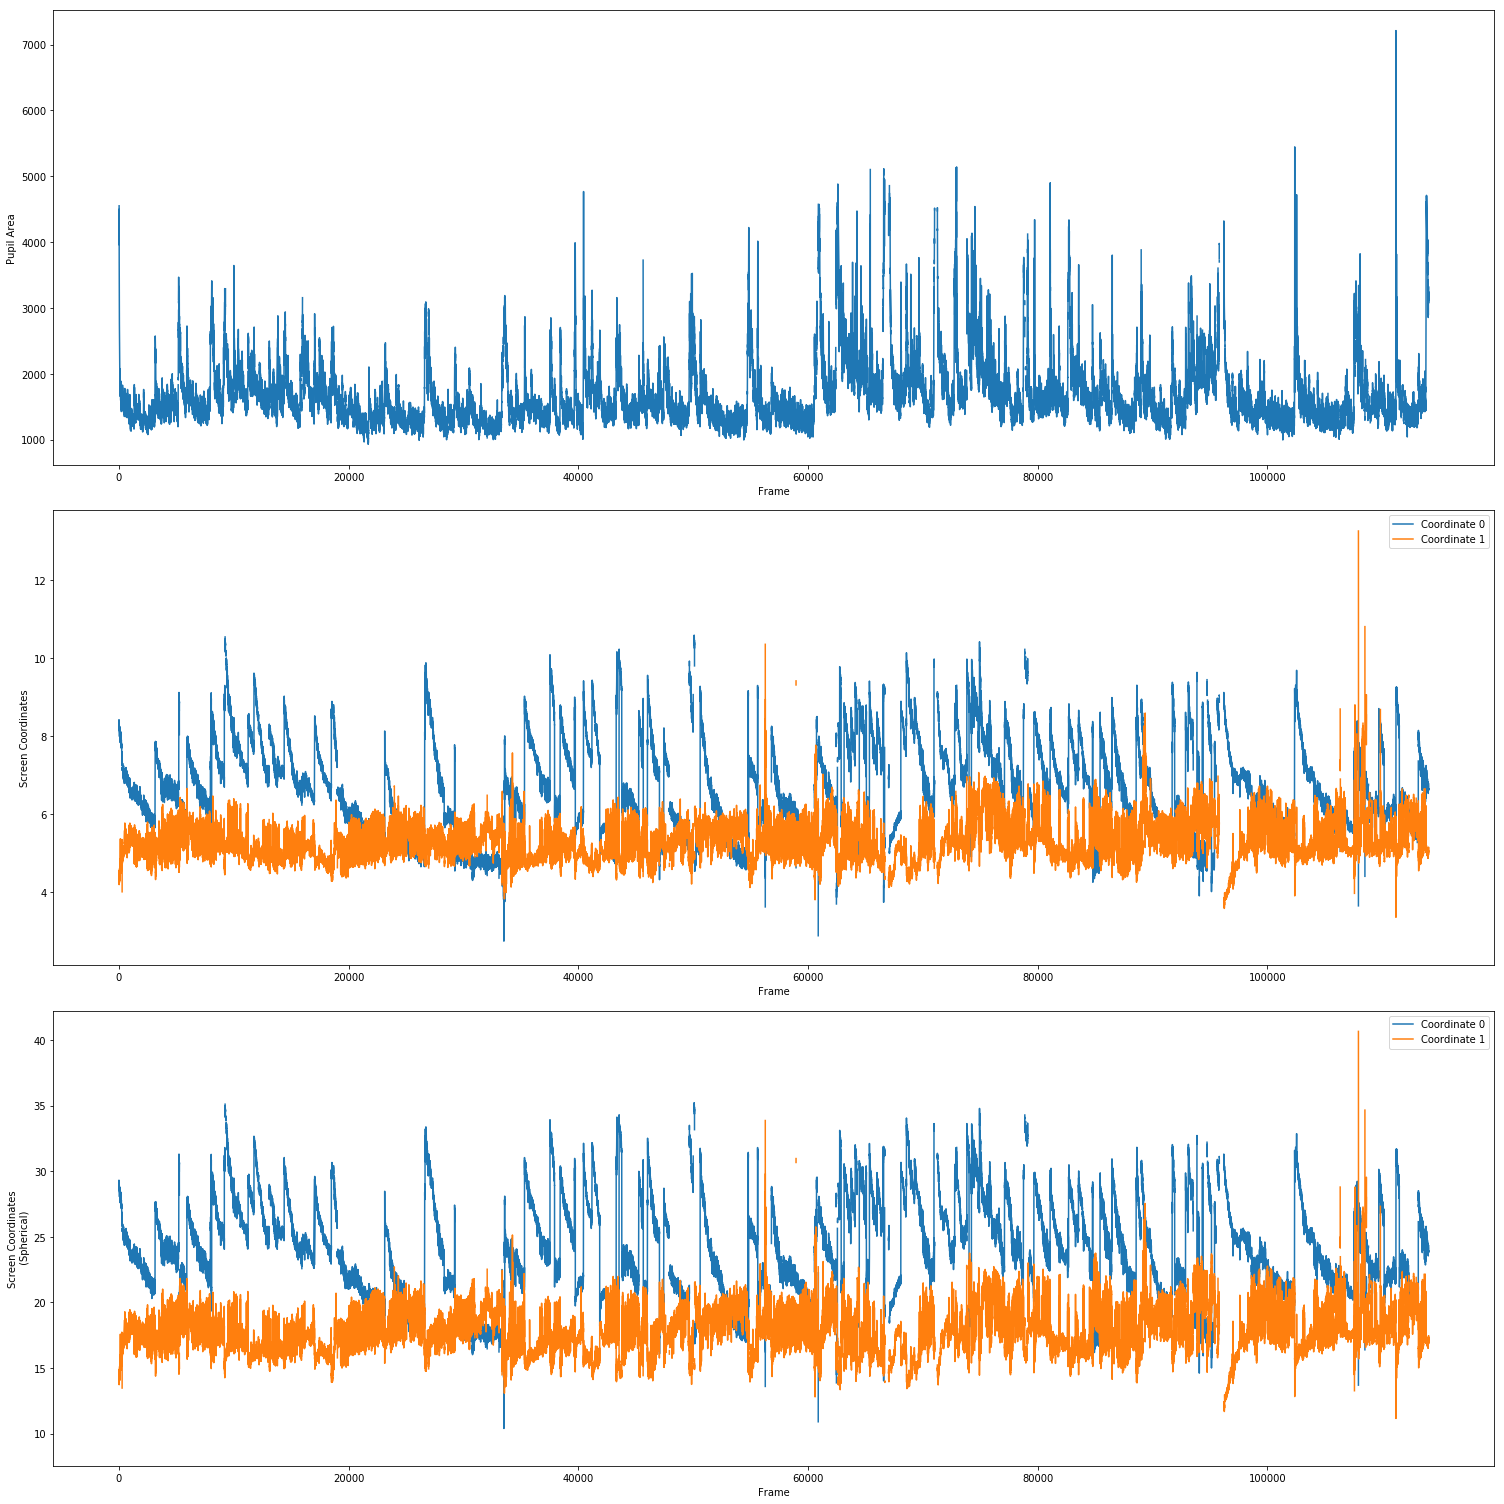

In [114]:
screen_mapping_filepath = '/allen/aibs/technology/waynew/eye/568796683/568796683_eyetracking_to_screen_mapping.h5'

f = h5py.File(screen_mapping_filepath)
pupil_areas = f['pupil_areas'][:]
screen_coordinates = f['screen_coordinates'][:]
screen_coordinates_spherical = f['screen_coordinates_spherical'][:]
f.close()

num_rows = 3
fig_size = 7
fig_aspect_ratio = 3
fig, ax = plt.subplots(num_rows,1, figsize=(fig_size*fig_aspect_ratio, num_rows*fig_size))
xlabel = 'Frame'

ax_ind, ylabel = 0, 'Pupil Area'
ax[ax_ind].plot(pupil_areas)
ax[ax_ind].set_xlabel(xlabel)
ax[ax_ind].set_ylabel(ylabel)

ax_ind, ylabel = 1, 'Screen Coordinates'
ax[ax_ind].plot(screen_coordinates[:,0])
ax[ax_ind].plot(screen_coordinates[:,1])
ax[ax_ind].set_xlabel(xlabel)
ax[ax_ind].set_ylabel(ylabel)
ax[ax_ind].legend(['Coordinate 0', 'Coordinate 1'])

ax_ind, ylabel = 2, 'Screen Coordinates\n (Spherical)'
ax[ax_ind].plot(screen_coordinates_spherical[:,0])
ax[ax_ind].plot(screen_coordinates_spherical[:,1])
ax[ax_ind].set_xlabel(xlabel)
ax[ax_ind].set_ylabel(ylabel)
ax[ax_ind].legend(['Coordinate 0', 'Coordinate 1'])

fig.tight_layout()

## Comparing old vs new Eye Tracking:

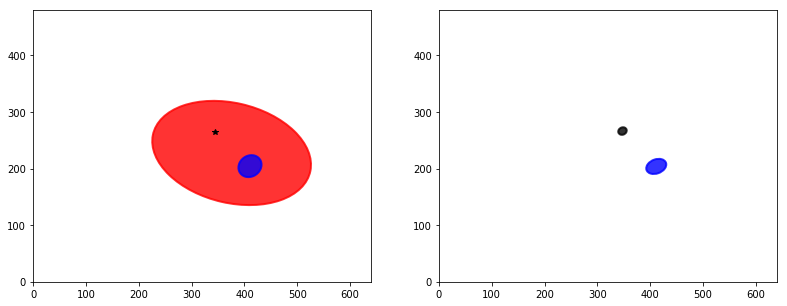

In [126]:
fi = 1000
num_cols = 2
fig_aspect_ratio = 640/480
fig_size = 5
screen_mapping_filepath = '/allen/aibs/technology/waynew/eye/550374428_265164_20161006_video-1DeepCut_resnet50_universal_eye_trackingApr25shuffle1_969000_ellipse_flat.h5'
cr_params_filepath = '/allen/programs/braintv/production/neuralcoding/prod13/specimen_539351920/ophys_experiment_550374428/eye_tracking/results/cr_params.npy'
pupil_params_filepath = '/allen/programs/braintv/production/neuralcoding/prod13/specimen_539351920/ophys_experiment_550374428/eye_tracking/results/pupil_params.npy'

fig, ax = plt.subplots(1, num_cols, figsize=(num_cols*fig_size*fig_aspect_ratio, fig_size))

# DLC:
df = pd.read_hdf(screen_mapping_filepath)
pupil_dlc = Ellipse((df.pupil_ellipse_center_x[fi].real, df.pupil_ellipse_center_y[fi].real), 
                        2*df.pupil_ellipse_width[fi].real, 
                        2*df.pupil_ellipse_height[fi].real, 
                        np.rad2deg(df.pupil_ellipse_phi[fi].real), 
                        alpha=0.8, 
                        ec='b', 
                        fc='b', 
                        lw=2, 
                        fill=True)

eye_dlc = Ellipse((df.eye_ellipse_center_x[fi].real, df.eye_ellipse_center_y[fi].real), 
                        2*df.eye_ellipse_width[fi].real, 
                        2*df.eye_ellipse_height[fi].real, 
                        np.rad2deg(df.eye_ellipse_phi[fi].real), 
                        alpha=0.8, 
                        ec='r', 
                        fc='r', 
                        lw=2, 
                        fill=True)


cr_data = np.load(cr_params_filepath)
pupil_data = np.load(pupil_params_filepath)


dataset = pupil_data
pupil_old = Ellipse((dataset[fi,0], dataset[fi,1]), dataset[fi,2], dataset[fi,3], dataset[fi,4], 
                        alpha=0.8, 
                        ec='b', 
                        fc='b', 
                        lw=2, 
                        fill=True)

dataset = cr_data
cr_old = Ellipse((dataset[fi,0], dataset[fi,1]), dataset[fi,2], dataset[fi,3], dataset[fi,4], 
                        alpha=0.8, 
                        ec='k', 
                        fc='k', 
                        lw=2, 
                        fill=True)


ax_ind = 0
ax[ax_ind].add_artist(eye_dlc)
ax[ax_ind].add_artist(pupil_dlc)
ax[ax_ind].plot([df['reflection_x'][fi]], [df['reflection_y'][fi]], '*k')
ax[ax_ind].set_xlim([0,640])
ax[ax_ind].set_ylim([0,480])

ax_ind = 1
ax[ax_ind].add_artist(pupil_old)
ax[ax_ind].add_artist(cr_old)
ax[ax_ind].set_xlim([0,640])
ax[ax_ind].set_ylim([0,480])

plt.show()